# Task 1
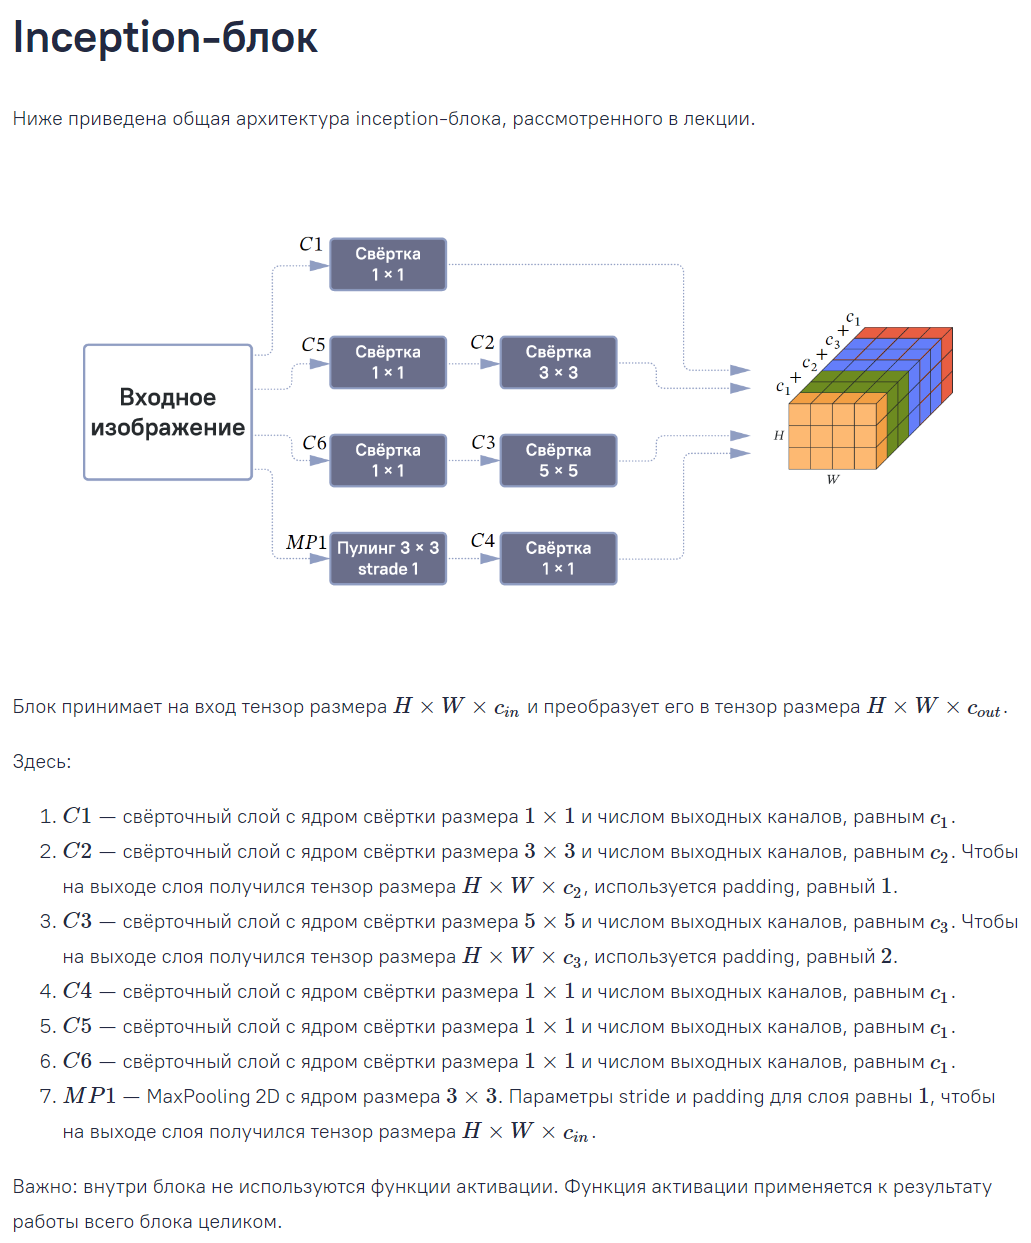

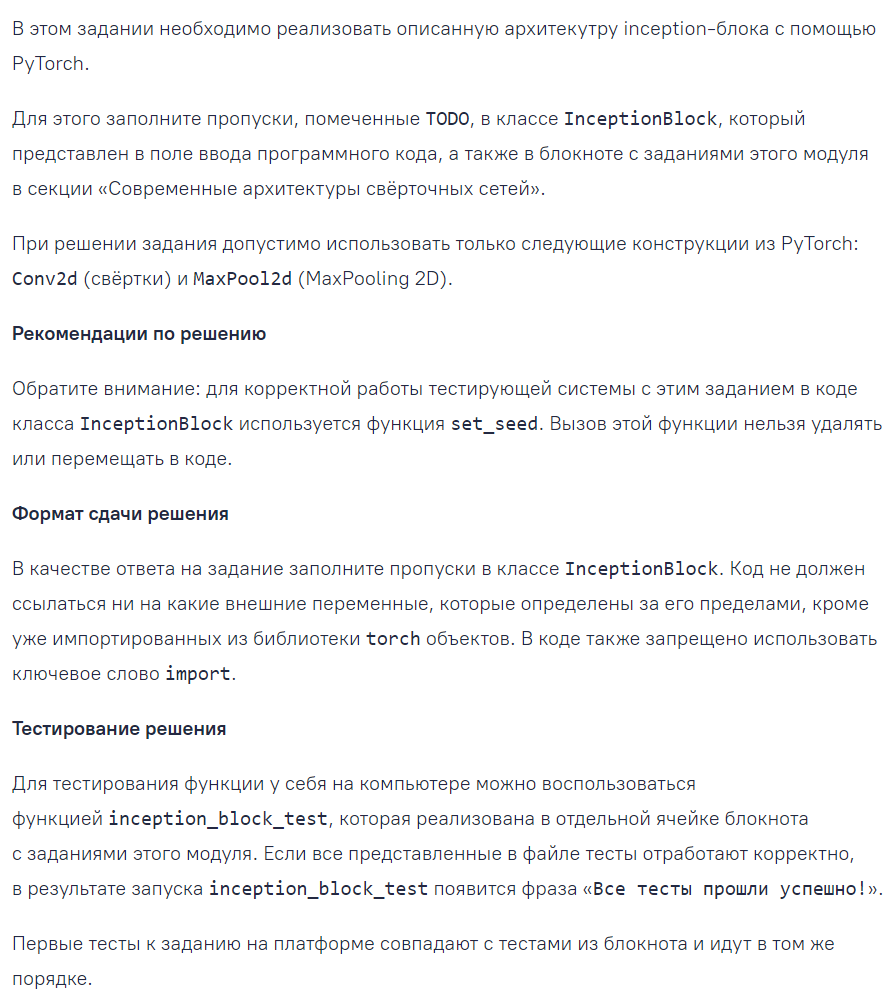

In [1]:
from torch.nn import Module, Sequential, Conv2d, MaxPool2d
from torch import cat

def set_seed():
    import random
    import numpy as np
    import torch
    
    SEED = 0

    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)

In [2]:
class InceptionBlock(Module):
    def __init__(self, c_in, c_1, c_3, c_5):
        # Необходимый для проверки корректности работы inception-блока код.
        set_seed()
        
        super().__init__()
        
        # TODO: Свёртка C1 размера 1x1.
        self.c1 = Conv2d(
            in_channels=c_in,
            out_channels=c_1,
            kernel_size=(1, 1)
        )
        
        # TODO: Свёртка C5 размера 1x1.
        self.c5 = Conv2d(
            in_channels=c_in,
            out_channels=c_1,
            kernel_size=(1, 1)
        )
        # TODO: Свёртка C2 размера 3x3. Параметр padding = 1.
        self.c2 = Conv2d(
            in_channels=c_1,
            out_channels=c_3,
            kernel_size=(3, 3),
            padding=1
        )
        
        # TODO: Свёртка C6 размера 1x1.
        self.c6 = Conv2d(
            in_channels=c_in,
            out_channels=c_1,
            kernel_size=(1, 1)
        )
        # TODO: Свёртка C3 размера 5x5. Параметр padding = 2.
        self.c3 = Conv2d(
            in_channels=c_1,
            out_channels=c_5,
            kernel_size=(5, 5),
            padding=2
        )
        
        # TODO: MaxPooling 2D MP1 размера 3x3. Параметры stride = 1, padding = 1.
        self.mp1 = MaxPool2d(
            kernel_size=(3, 3),
            stride=1,
            padding=1
        )
        # TODO: Свёртка C4 размера 1x1.
        self.c4 = Conv2d(
            in_channels=c_in,
            out_channels=c_1,
            kernel_size=(1, 1)
        )
        
        
        # Полная ветка блока со свёрткой 3x3.
        self.block_3_3 = Sequential(
            self.c5,
            self.c2,
        )
        
        # Полная ветка блока со свёрткой 5x5.
        self.block_5_5 = Sequential(
            self.c6,
            self.c3,
        )
        
        # Полная ветка блока с MaxPooling 2D.
        self.block_pool = Sequential(
            self.mp1,
            self.c4,
        )
    
    def forward(self, x):
        # В качестве результата работы inception-блок возвращает
        # соединение по размерности каналов результатов работы внутренних
        # свёрток и MaxPooling 2D.
        return cat([
            self.c1(x),
            self.block_3_3(x),
            self.block_5_5(x),
            self.block_pool(x),
        ], dim=1)

# DataLoader

In [3]:
import torch
from torchvision import datasets

download_dir = './dataset'

# Download train dataset
train_data = datasets.STL10(root=download_dir, download=True, split='train')

# Download val dataset
val_data = datasets.STL10(root=download_dir, download=True, split='test')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Normalization of train data
x_train = torch.tensor(train_data.data) / 255.
x_train.shape

torch.Size([5000, 3, 96, 96])

In [5]:
# Targets of 10 classes
y_train = torch.tensor(train_data.labels)
print(y_train.shape, y_train.min(), y_train.max(), sep='\n')

torch.Size([5000])
tensor(0, dtype=torch.uint8)
tensor(9, dtype=torch.uint8)


In [6]:
classes = train_data.classes
classes

['airplane',
 'bird',
 'car',
 'cat',
 'deer',
 'dog',
 'horse',
 'monkey',
 'ship',
 'truck']

In [7]:
# Validation X and y
x_val = torch.tensor(val_data.data) / 255.
y_val = torch.tensor(val_data.labels)

print(x_val.shape, y_val.shape, sep='\n')

torch.Size([8000, 3, 96, 96])
torch.Size([8000])


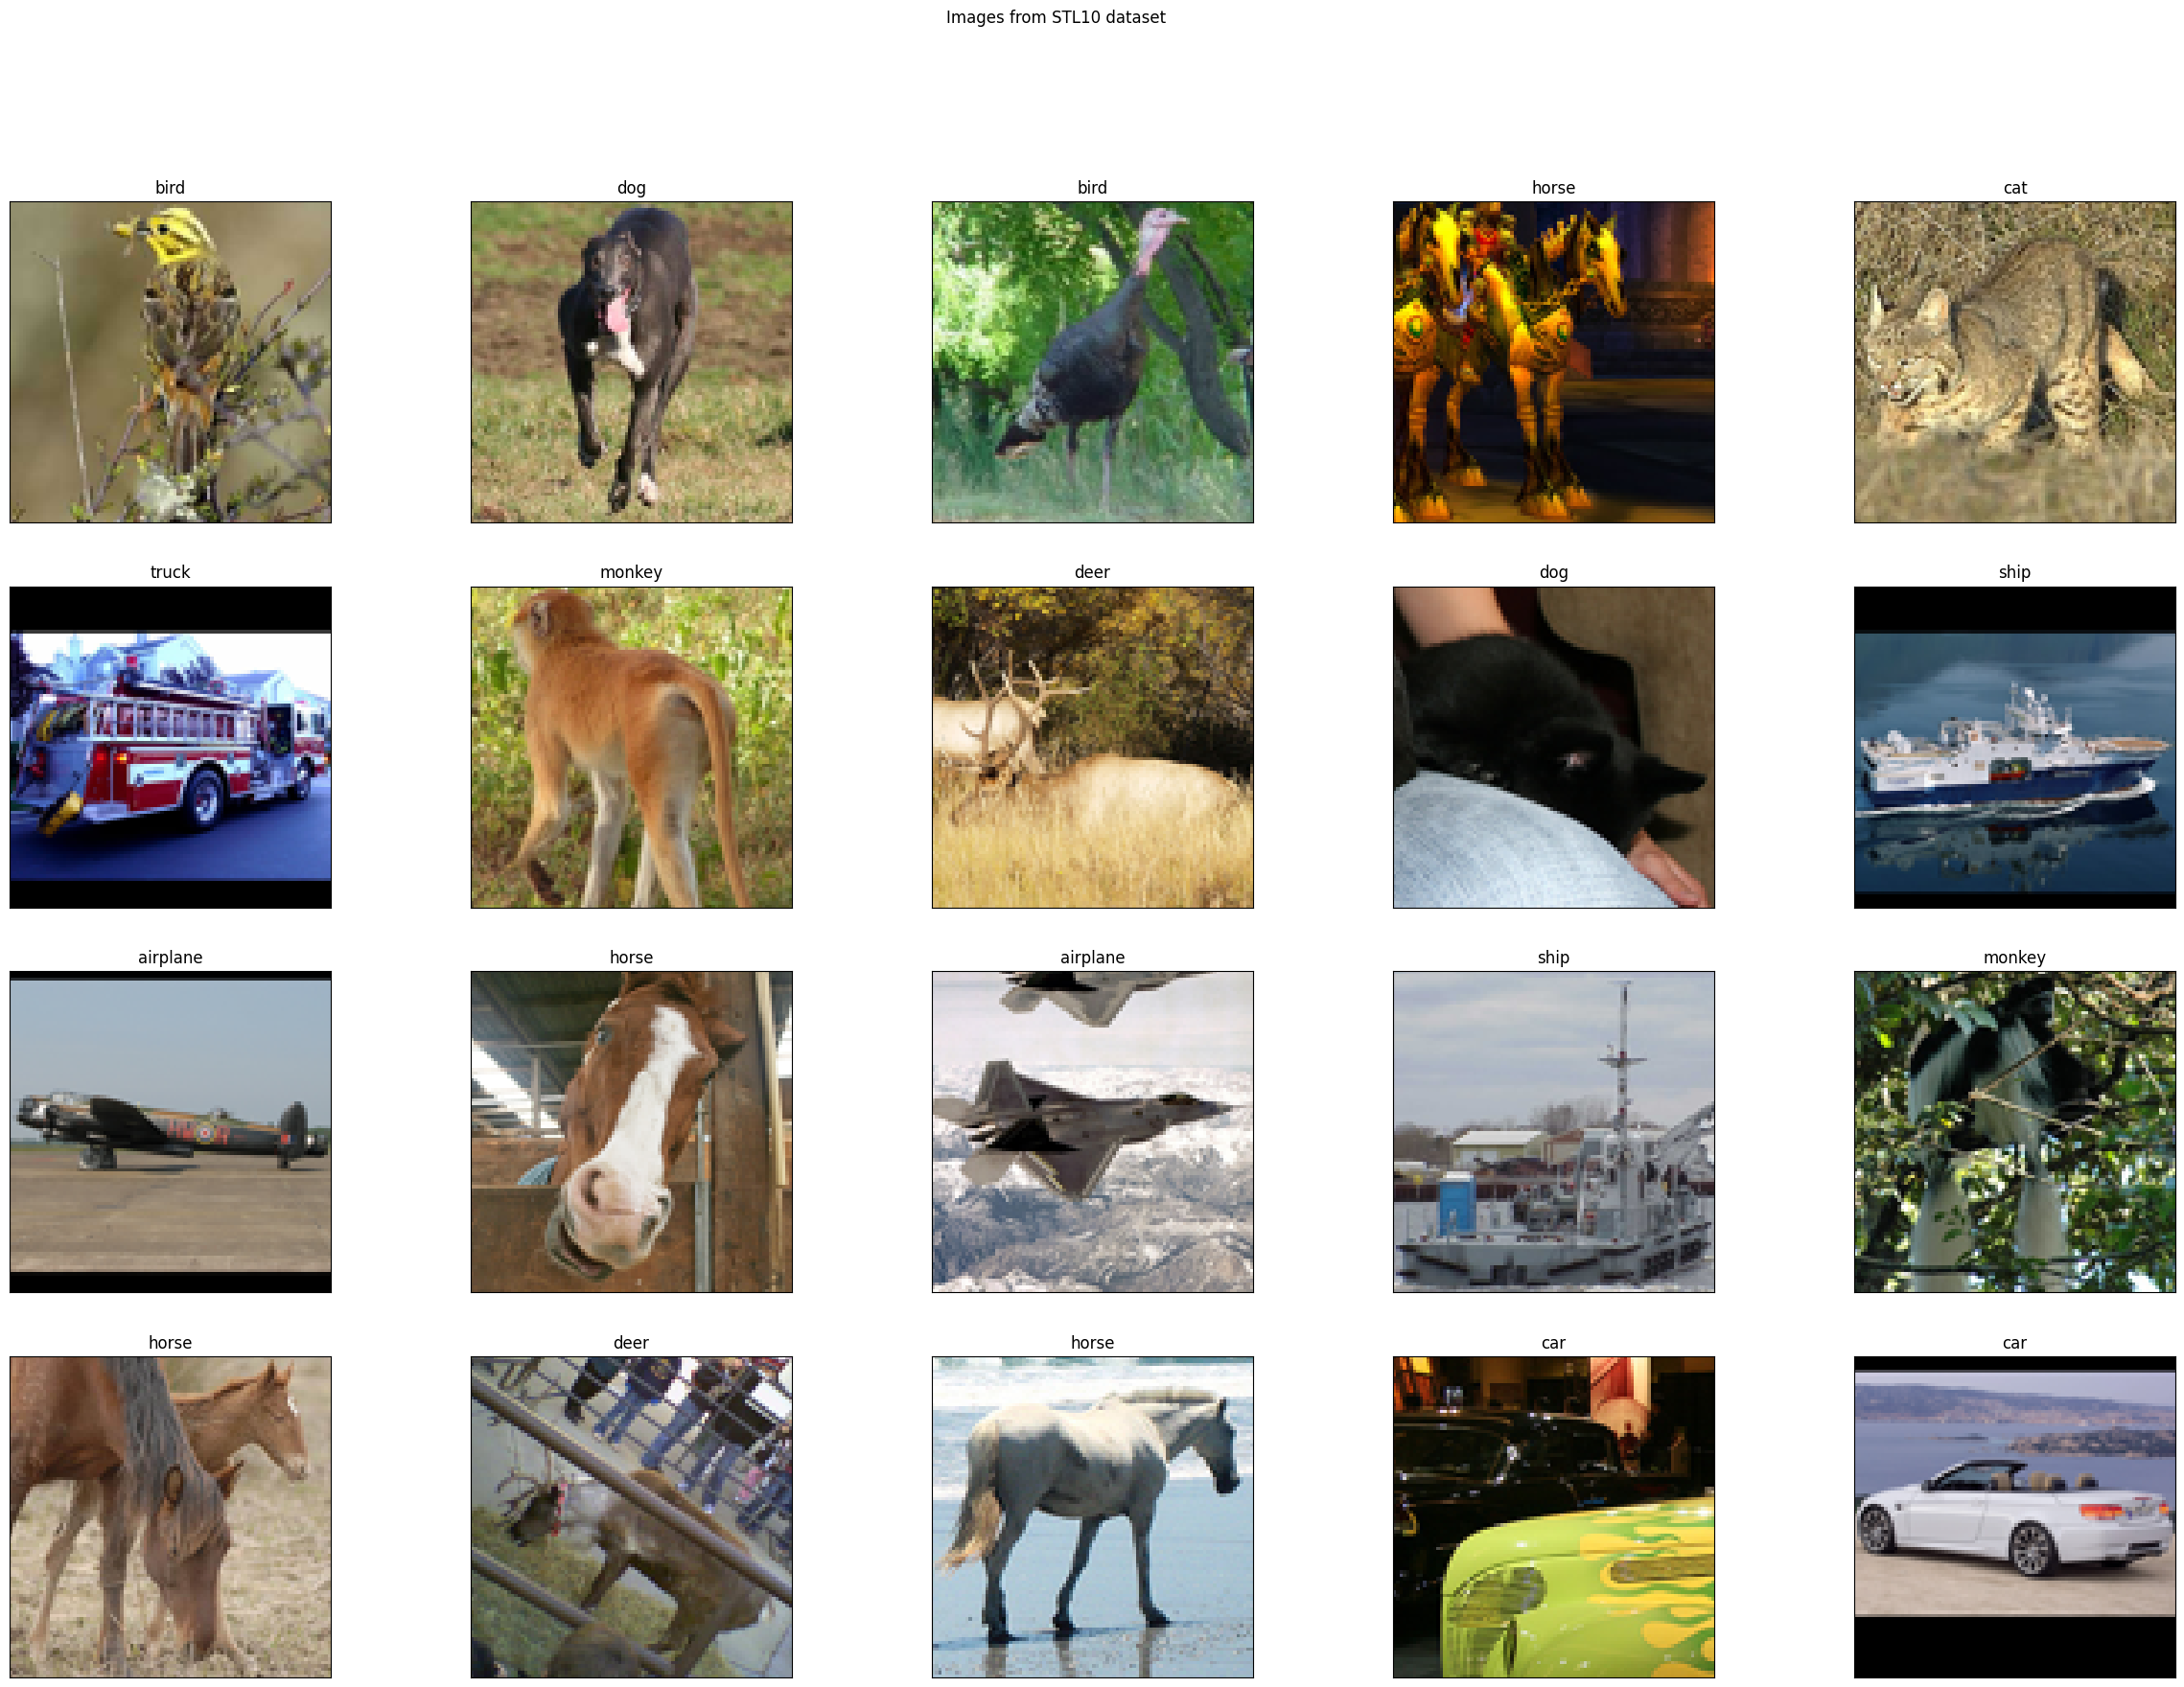

In [8]:
# Visualize data
import matplotlib.pyplot as plt

H = 4
W = 5

fig, ax = plt.subplots(H, W, figsize=(30, 5 * H))
fig.suptitle('Images from STL10 dataset')

for i, (x, y) in enumerate(zip(x_train, y_train)):
    if i >= H * W:
        break
        
    plt.subplot(H, W, i + 1)
    plt.imshow(x.permute(1, 2, 0))
    plt.xticks([])  # Remove coordinates from Ox axes
    plt.yticks([])
    plt.title(classes[y])
plt.show()

In [9]:
# My Dataset class (wrapper)
class MyDataset(torch.utils.data.Dataset):  # Inherited from Dataset class
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):  
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [10]:
train_dataset = MyDataset(x_train, y_train)
train_dataset

In [11]:
train_dataset[0]

(tensor([[[0.5725, 0.5725, 0.5725,  ..., 0.6353, 0.6353, 0.6353],
          [0.5725, 0.5725, 0.5725,  ..., 0.6392, 0.6392, 0.6392],
          [0.5725, 0.5725, 0.5725,  ..., 0.6431, 0.6431, 0.6431],
          ...,
          [0.5098, 0.5176, 0.4588,  ..., 0.5373, 0.5882, 0.5529],
          [0.5255, 0.6078, 0.3451,  ..., 0.5294, 0.5333, 0.5373],
          [0.5294, 0.3804, 0.4549,  ..., 0.5412, 0.5765, 0.5412]],
 
         [[0.5608, 0.5608, 0.5608,  ..., 0.6235, 0.6235, 0.6235],
          [0.5608, 0.5608, 0.5608,  ..., 0.6196, 0.6196, 0.6196],
          [0.5608, 0.5608, 0.5608,  ..., 0.6196, 0.6196, 0.6196],
          ...,
          [0.4471, 0.4667, 0.4078,  ..., 0.5176, 0.5412, 0.4784],
          [0.4627, 0.5529, 0.2902,  ..., 0.5137, 0.4863, 0.4706],
          [0.4667, 0.3255, 0.4078,  ..., 0.4980, 0.5333, 0.5020]],
 
         [[0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
          [0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
          [0.4314, 0.4314, 0.4314,  ...,

In [12]:
# Wrapper whick helps not to point batchs manually
train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=100,
    shuffle=True,  # Batchs always different
    drop_last=True
)

In [13]:
# Iterator with batch from data
for imgs, targets in train_dataloader:
    print(imgs.shape, targets.shape, sep='\n')
    break

torch.Size([100, 3, 96, 96])
torch.Size([100])


# Task 2
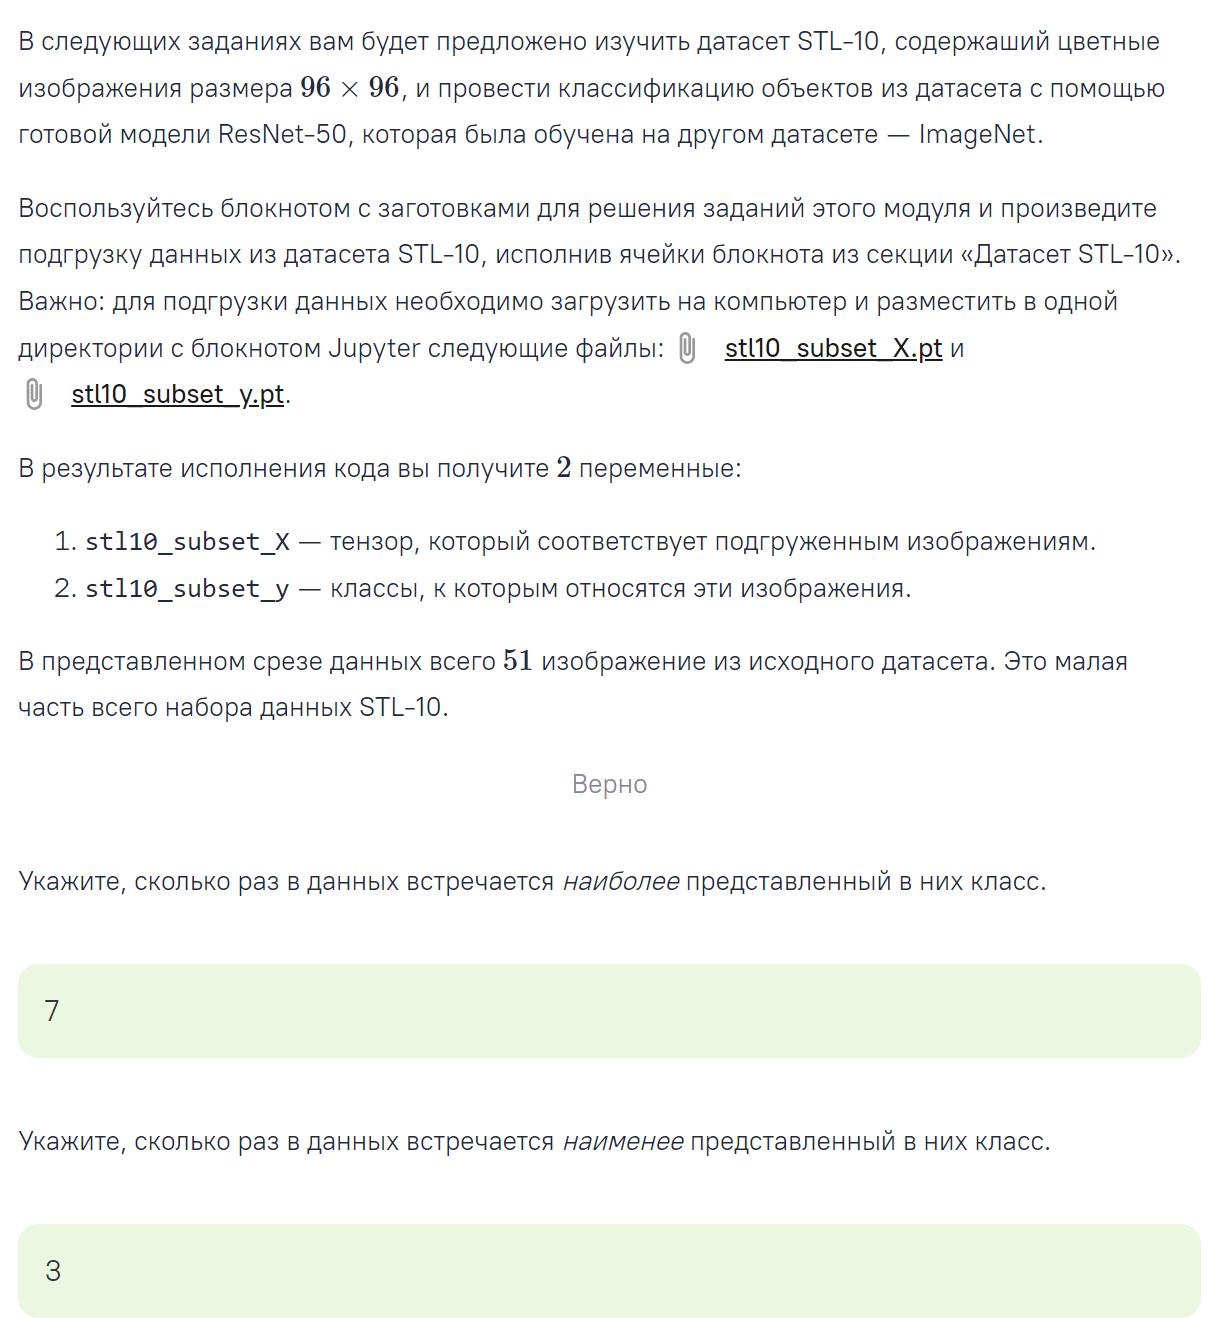

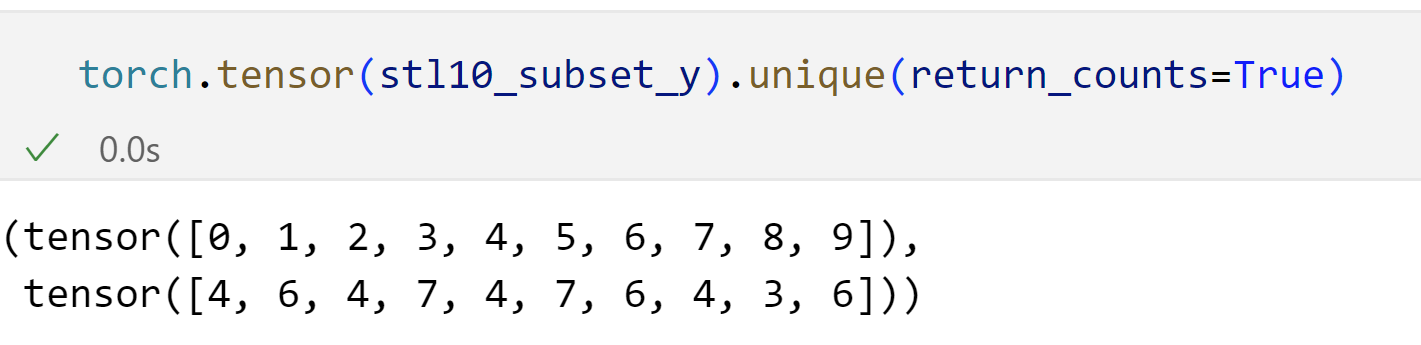

# Augmentation and data normalization using transforms

# Task 3
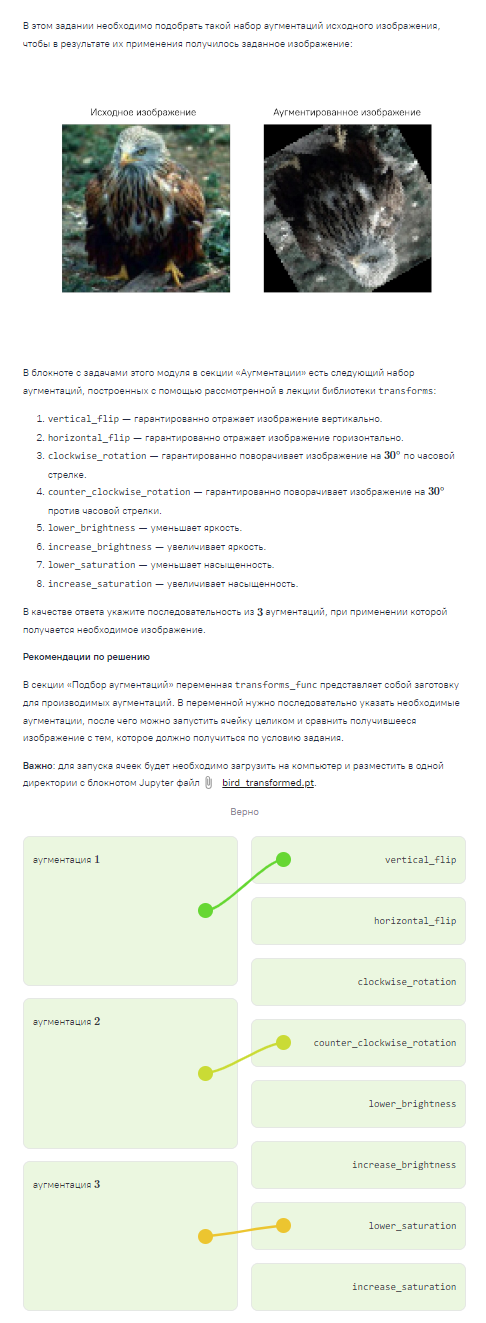

### <span style="color: red">[TRANSFORMING AND AUGMENTING IMAGES](https://pytorch.org/vision/stable/transforms.html)<span>

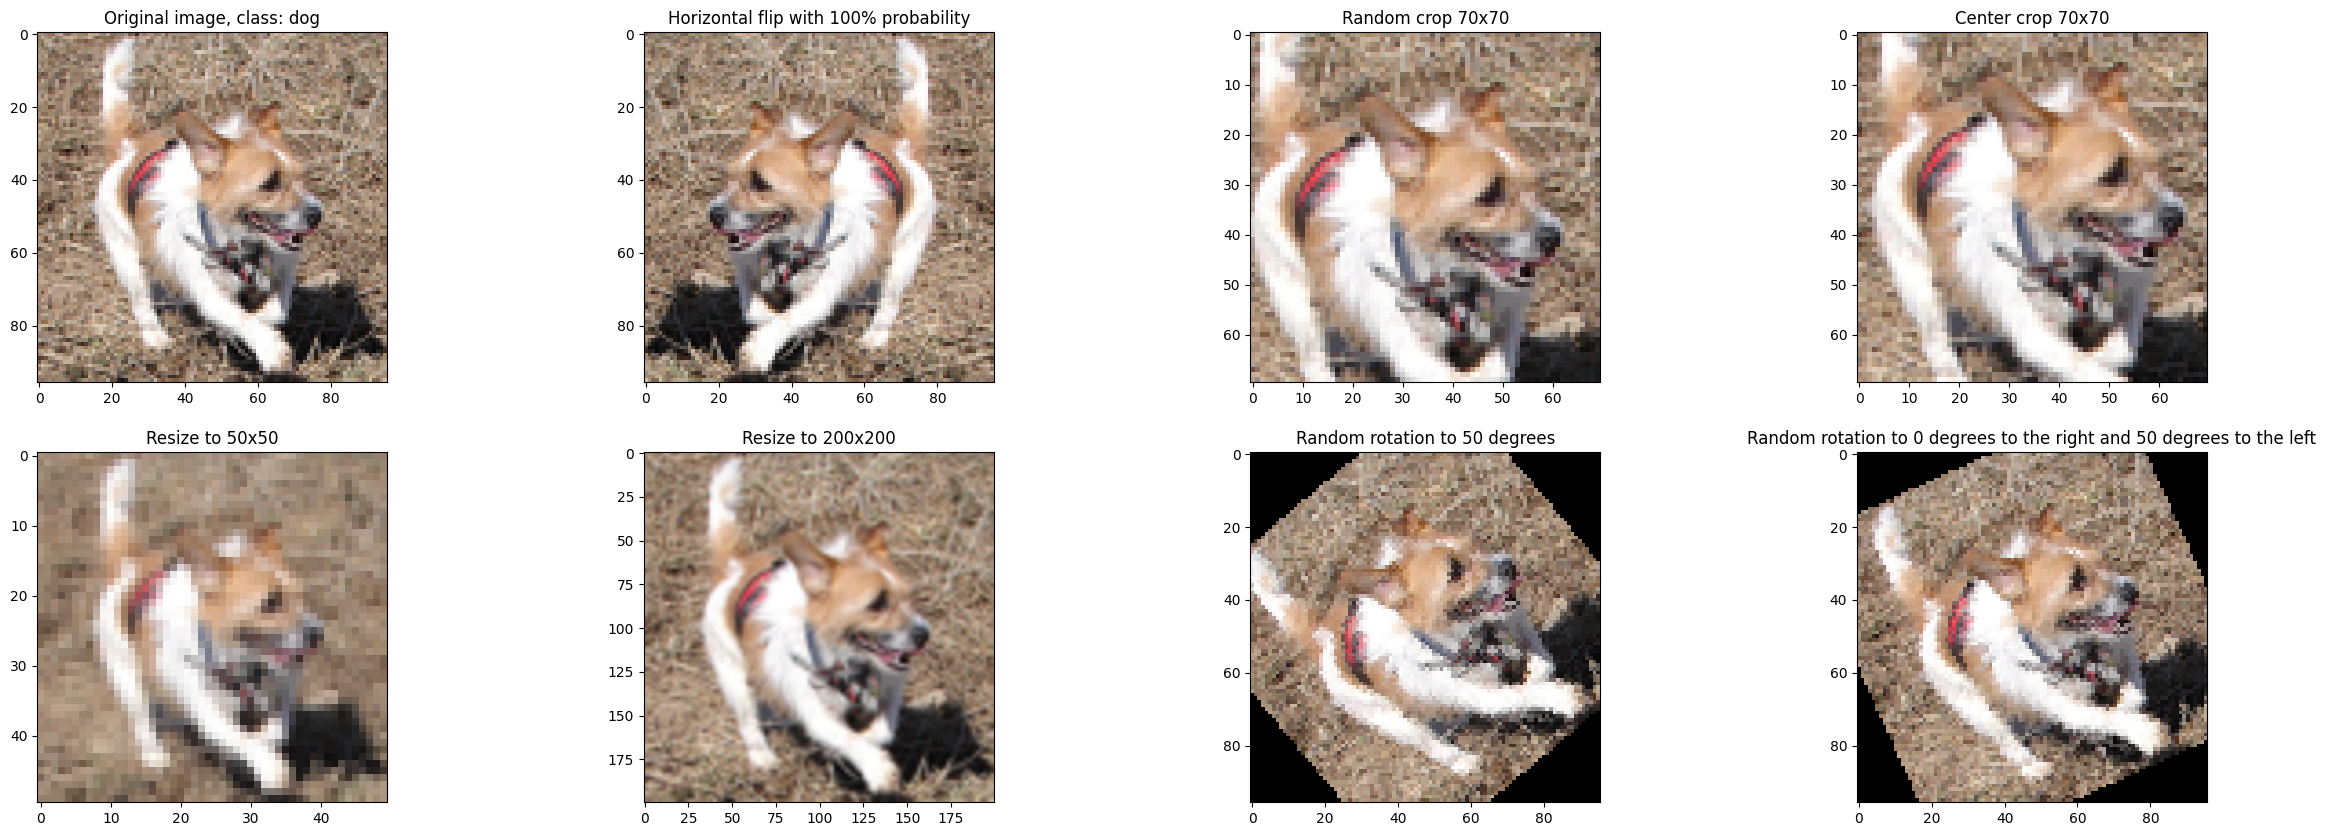

In [14]:
from torchvision import transforms  # Here must be different augmentations

img_ind = 1501

img = transforms.ToPILImage()(x_train[img_ind])  # PilImage - one of the formats of storing in Python

fig, ax = plt.subplots(2, 4, figsize=(30, 10))

plt.subplot(241)
plt.imshow(img)
plt.title(f'Original image, class: {classes[y_train[img_ind]]}')

plt.subplot(242)
plt.imshow(transforms.RandomHorizontalFlip(1.)(img))
plt.title('Horizontal flip with 100% probability')

plt.subplot(243)
plt.imshow(transforms.RandomCrop((70, 70))(img))
plt.title('Random crop 70x70')

plt.subplot(244)
plt.imshow(transforms.CenterCrop((70, 70))(img))
plt.title('Center crop 70x70')

plt.subplot(245)
plt.imshow(transforms.Resize((50, 50))(img))
plt.title('Resize to 50x50')

plt.subplot(246)
plt.imshow(transforms.Resize((200, 200))(img))
plt.title('Resize to 200x200')

plt.subplot(247)
plt.imshow(transforms.RandomRotation(50)(img))
plt.title('Random rotation to 50 degrees')

plt.subplot(248)
plt.imshow(transforms.RandomRotation((0, 50))(img))
plt.title('Random rotation to 0 degrees to the right and 50 degrees to the left');

## Augmentations with color and light

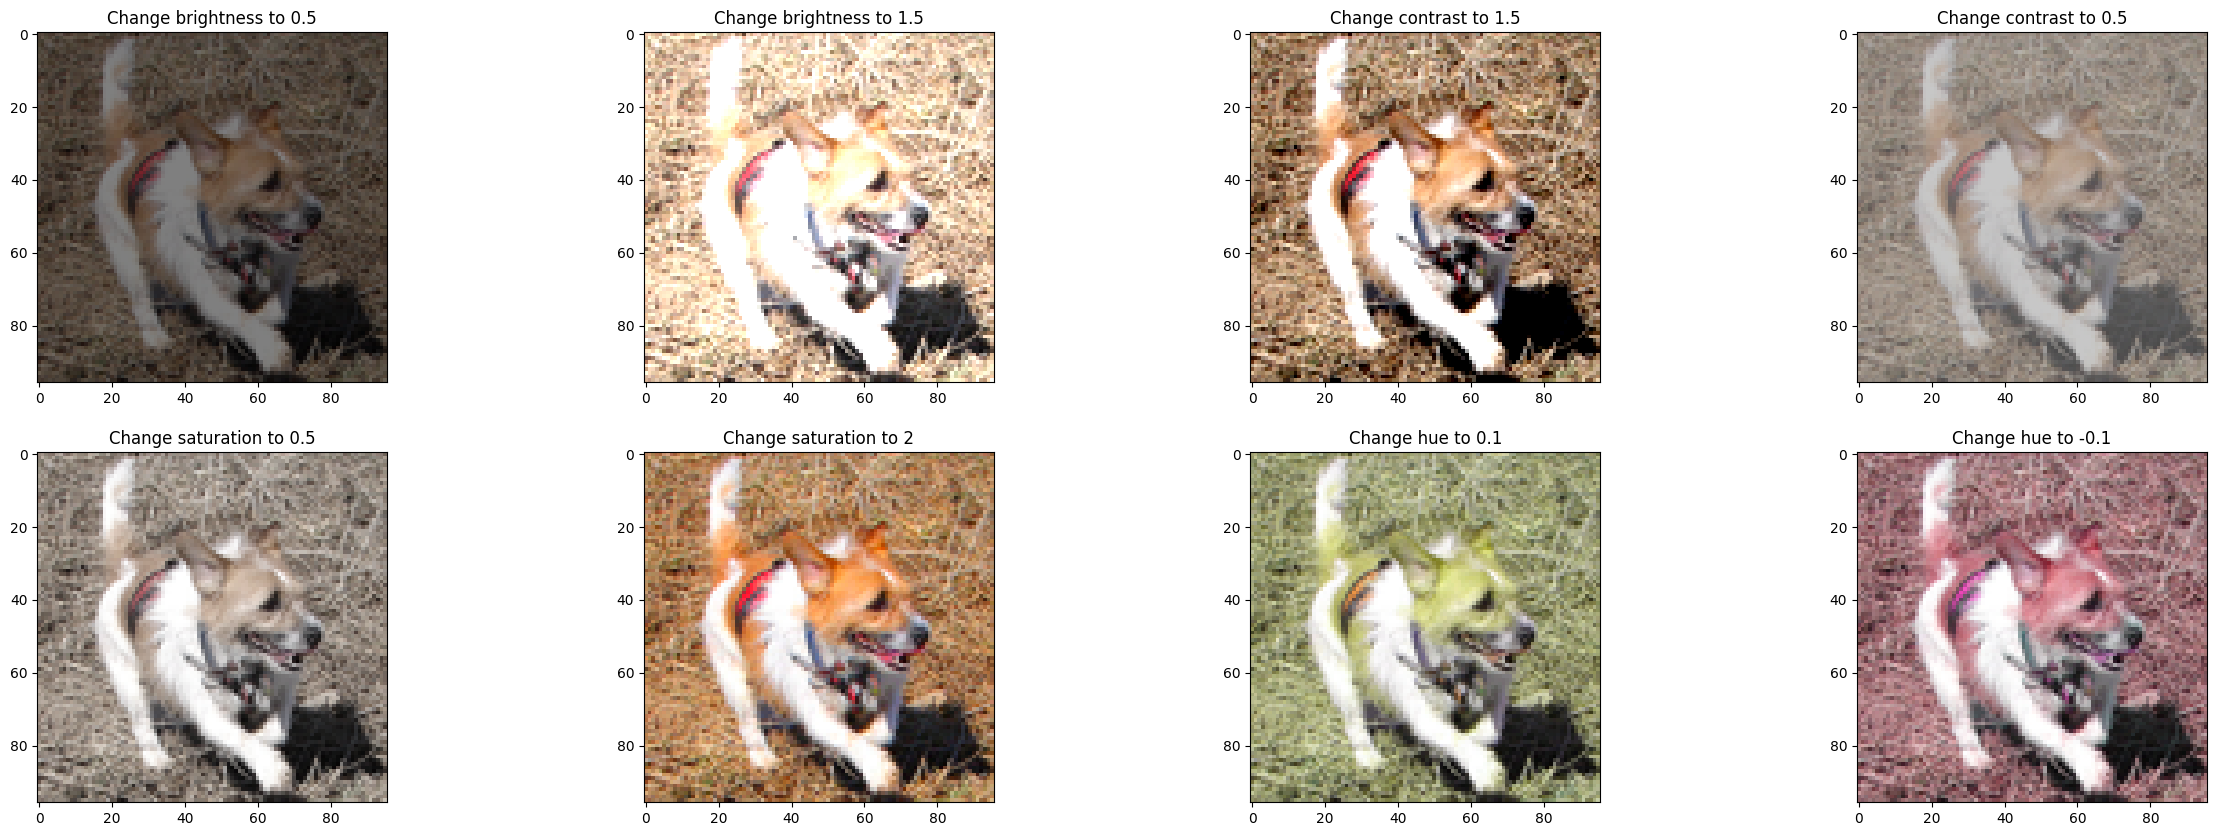

In [15]:
fig, ax = plt.subplots(2, 4, figsize=(30, 10))

plt.subplot(241)
plt.imshow(transforms.ColorJitter(brightness=(0.5, 0.5))(img))
plt.title('Change brightness to 0.5')

plt.subplot(242)
plt.imshow(transforms.ColorJitter(brightness=(1.5, 1.5))(img))
plt.title('Change brightness to 1.5')

plt.subplot(243)
plt.imshow(transforms.ColorJitter(contrast=(1.5, 1.5))(img))
plt.title('Change contrast to 1.5')

plt.subplot(244)
plt.imshow(transforms.ColorJitter(contrast=(0.5, 0.5))(img))
plt.title('Change contrast to 0.5')

plt.subplot(245)
plt.imshow(transforms.ColorJitter(saturation=(0.5, 0.5))(img))
plt.title('Change saturation to 0.5')

plt.subplot(246)
plt.imshow(transforms.ColorJitter(saturation=(2, 2))(img))
plt.title('Change saturation to 2')

plt.subplot(247)
plt.imshow(transforms.ColorJitter(hue=(0.1, 0.1))(img))
plt.title('Change hue to 0.1')

plt.subplot(248)
plt.imshow(transforms.ColorJitter(hue=(-0.1, -0.1))(img))
plt.title('Change hue to -0.1');

# [COLORJITTER](https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html)

In [16]:
# Add transformers to dataset-level
class AddTransformsDataset(torch.utils.data.Dataset):
    def __init__(self, x, y, transforms=None):
        self.x = x
        self.y = y
        self.transforms = transforms
        
    def __len__(self) -> int:
        return len(self.x)
    
    def __getitem__(self, index: int):
        image = self.x[index]
        if self.transforms is not None:
            image = self.transforms(image)
        return image, self.y[index]

In [17]:
# Average and std by channels
channel_mean = x_train.mean(3).mean(2).mean(0)
channel_std = x_train.std(3).std(2).std(0)

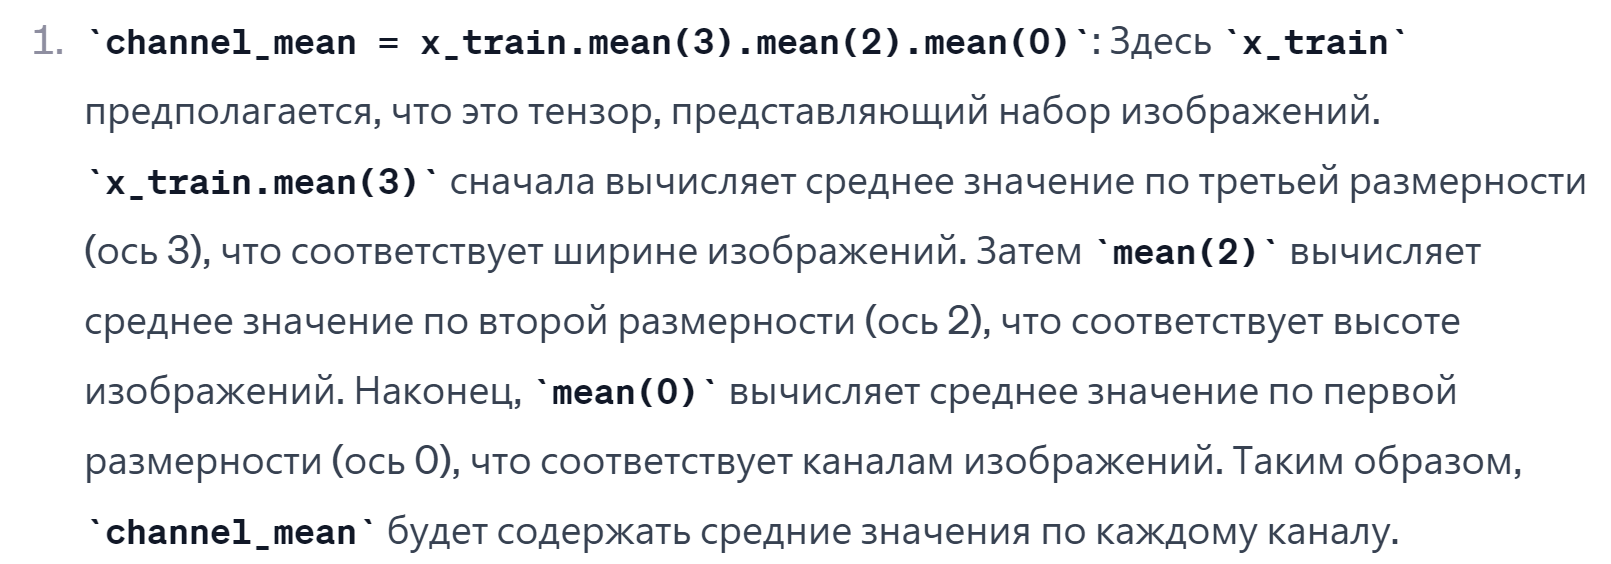

In [18]:
# Many transformations in one time
train_transforms = transforms.Compose([
    transforms.ToPILImage(),  # Convert a tensor or an ndarray to PIL Image
    transforms.Resize((256, 256)),
    transforms.RandomRotation(30),
    transforms.RandomCrop((224, 224)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.3),
    transforms.ToTensor(),  # Convert a PIL Image or ndarray to tensor
    # Normalize a tensor image with mean and standard deviation
    transforms.Normalize(mean=channel_mean, std=channel_std)
])

In [19]:
# Inverse normalization
def de_normalize(img):
    return(img * channel_std[:, None, None] + channel_mean[:, None, None]).permute(1, 2, 0)

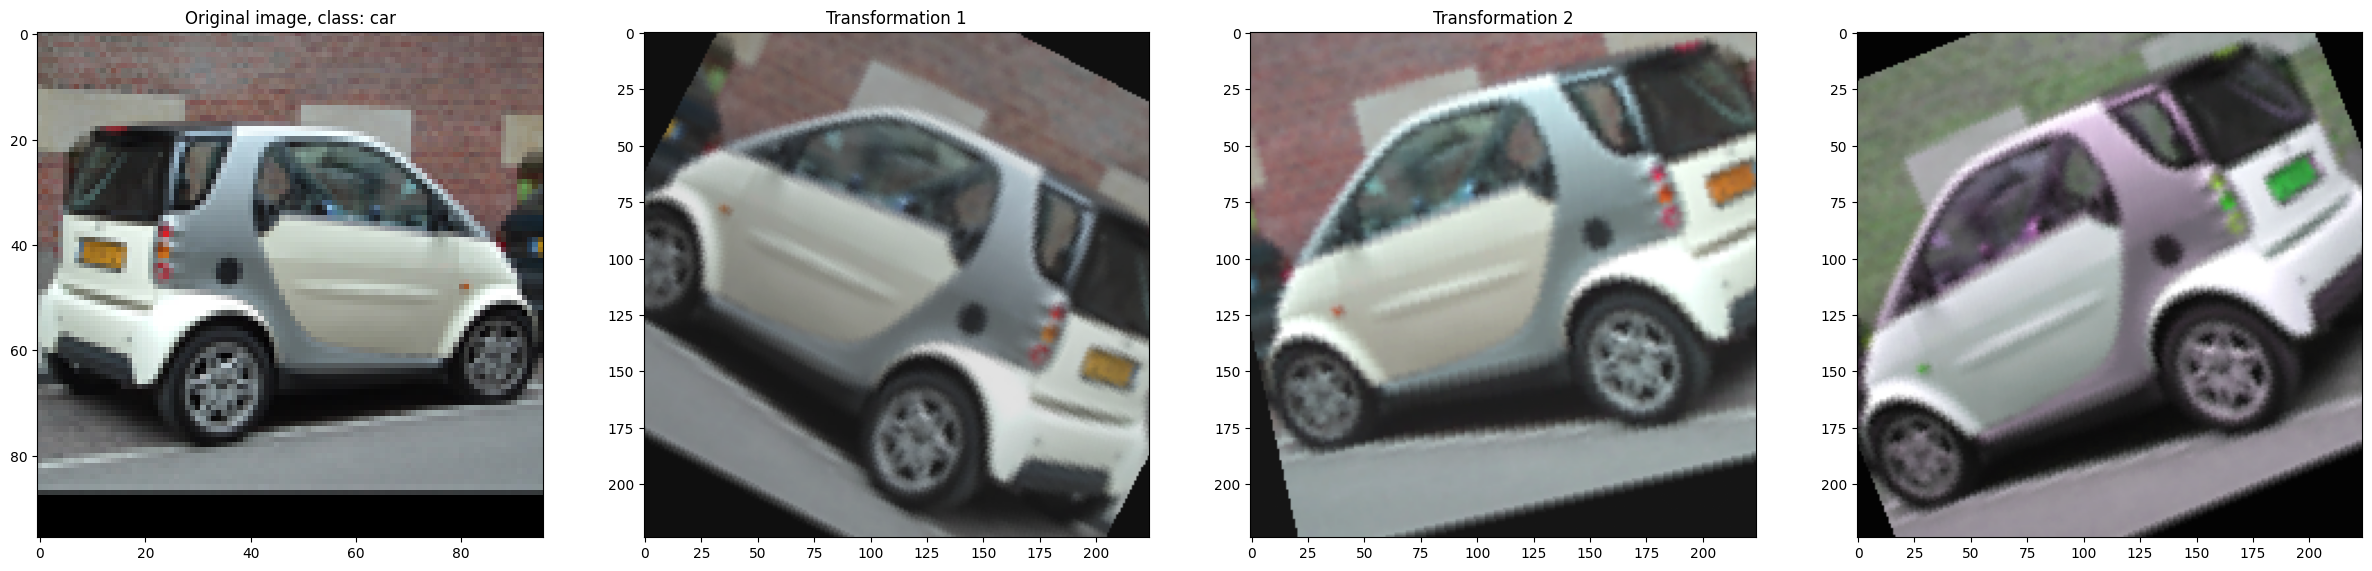

In [23]:
img_ind = 2001

img = x_train[img_ind]

fig, ax = plt.subplots(1, 4, figsize=(30, 10))

plt.subplot(141)
plt.imshow(img.permute(1, 2, 0))
plt.title(f'Original image, class: {classes[y_train[img_ind]]}')

plt.subplot(142)
plt.imshow(de_normalize(train_transforms(img)), vmin=0., vmax=1.)
plt.title('Transformation 1')

plt.subplot(143)
plt.imshow(de_normalize(train_transforms(img)), vmin=0., vmax=1.)
plt.title('Transformation 2')

plt.subplot(144)
plt.imshow(de_normalize(train_transforms(img)), vmin=0., vmax=1.)
           
plt.show();

In [24]:
# Transformation for validation
val_transforms = transforms.Compose([
    transforms.ToPILImage(),  # Convert a tensor or an ndarray to PIL Image
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),  # Convert a PIL Image or ndarray to tensor
    # Normalize a tensor image with mean and standard deviation
    transforms.Normalize(mean=channel_mean, std=channel_std)
])

In [27]:
# Finally got datasets and dataloaders
train_dataset = AddTransformsDataset(x_train, y_train, train_transforms)
val_dataset = AddTransformsDataset(x_val, y_val, val_transforms)

train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset,  # Dataset must be in torch.utils.data.Dataset format
    batch_size=200,
    shuffle=True,
    drop_last=True,  # If objects are not enough for full batch
    num_workers=8  # How much CPU kernels will be used during calculations
)

train_dataloader = torch.utils.data.DataLoader(
    dataset=val_dataset,  # Dataset must be in torch.utils.data.Dataset format
    batch_size=200,
    shuffle=False,
    drop_last=False,  # If objects are not enough for full batch
    num_workers=8
)